### CarDekho Price Prediction

### Importing libraries

In [180]:
# Created new env named cardekho in the Data folder
#conda create -n  cardekho 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime
import seaborn as sns


### Importing the data

In [181]:
raw = pd.read_csv('car data.csv')
raw.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### EDA

In [182]:
# Shape: 301 rows and 9 columns
print(raw.shape)

# Checking the columns 
print(raw.columns)

# Categorial columns: Fuel_type, Seller_type, Transmission, Owner 
# Remaining columns: Car_Name, Year, Selling_Price, Present_Price, Kms_Driven

(301, 9)
Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


In [183]:
# Checking the values in categorical columns
df1 = raw[['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

for i in df1.columns:
    print(i, df1[i].unique())

Fuel_Type ['Petrol' 'Diesel' 'CNG']
Seller_Type ['Dealer' 'Individual']
Transmission ['Manual' 'Automatic']
Owner [0 1 3]


In [184]:
# Checking missing or null values
raw.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [185]:
# Checking summary of DataFrame
raw.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [186]:
# Using Year feature to create a new feature NumYears: (Current Year - Year) 

In [187]:
data1 = raw.copy()
data1.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [188]:
data1 = data1[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
data1.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [189]:
# Creating a new column for current year and calculating the difference in Year
data1['Current_Year']= datetime.date.today().year
data1.head()
data1['DateDiff']= data1.Current_Year - data1.Year
data1.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,DateDiff
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [190]:
# Dropping the Year Column as its not required and can be rederived usinf Current_Year and DateDiff
# Inplace = True means that the operation is a permanent operation
data1.drop(['Year','Current_Year'],axis=1,inplace=True)
data1.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,DateDiff
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [191]:
# Converting categorical features using One Hot Encoding
data2 = data1.copy()
data2 = pd.get_dummies(data2,drop_first=True)
# drop_first = True : Whether to get k-1 dummies out of k categorical levels by removing the first level
data2.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,DateDiff,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [192]:
# Finding correlation amongst variables
data2.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,DateDiff,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
DateDiff,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


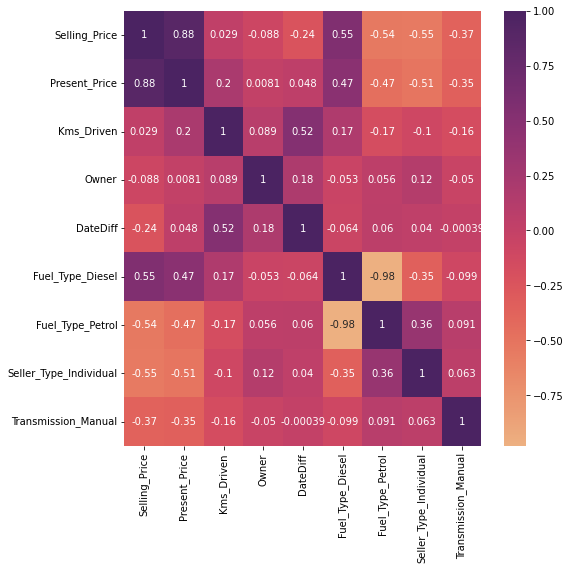

In [193]:
# Ptotting the correlation in the form of heatmap.
corrmat = data2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(8,8))

g = sns.heatmap(data2[top_corr_features].corr(),annot=True,cmap='flare')

In [194]:
# When we have huge number of features then in that case use condition,
# If corr > 0.7 or corr < -0.8

In [195]:
# Separating the X and the Y
# In our case, Y is the selling price that we need to pridict based on the indepdent variables.
X = data2.iloc[:,1:]
y = data2.iloc[:,0]

print(X.shape, y.shape)

(301, 8) (301,)


### Feature Importance

In [196]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)


[0.40013482 0.04089957 0.00041128 0.07589255 0.22212769 0.0162131
 0.11823634 0.12608464]


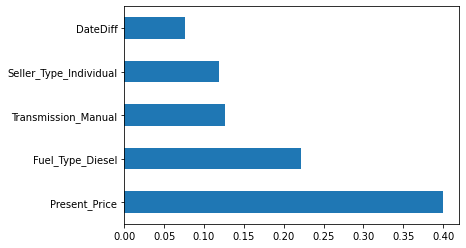

In [197]:
# This will create a series, with  features as columns and its importance, Further we plot the top 5 features which are associated with the selling price
fea_importance = pd.Series(model.feature_importances_,index=X.columns)
fea_importance.nlargest(5).plot(kind='barh')
plt.show()

### Train test split

In [198]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
# Checking the shape 
print(X_train.shape, y_train.shape, X_test.shape,y_test.shape)

(240, 8) (240,) (61, 8) (61,)


### Models

#### RandomForest Regression

In [199]:
from sklearn.model_selection import RandomizedSearchCV
# Hyper paramters
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30, num=6)]
min_samples_leaf = [1,2,5,10]
min_samples_split =[2,5,10,15,100]

random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
                'max_depth':max_depth,
                'min_samples_leaf':min_samples_leaf,
                'min_samples_split':min_samples_split}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_leaf': [1, 2, 5, 10], 'min_samples_split': [2, 5, 10, 15, 100]}


In [200]:

from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,random_state=42,n_jobs=1)
rf_random.fit(X_train,y_train)
#Creating predictions
y_pred = rf_random.predict(X_test)


In [201]:
# Checking the mse and r2_score
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
# Print mse results
print("Mean Squared Error is: ",mse)
# Printing R-square for Training data
print("R2 on Training Data is: ",r2_score(y_train,rf_random.predict(X_train)))

# Printing R-square for Test data
print("R2 on Test Data is: ",r2_score(y_test,rf_random.predict(X_test)))



Mean Squared Error is:  8.724024925026267
R2 on Training Data is:  0.9893238160816608
R2 on Test Data is:  0.7179250788960843


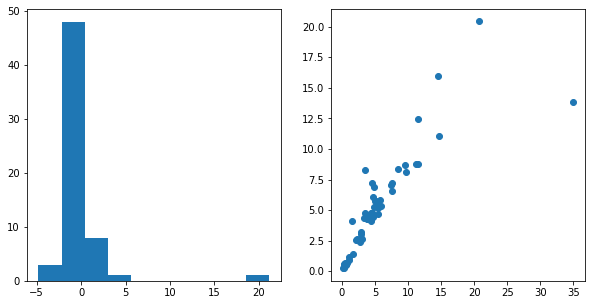

In [202]:
# Checking the distribution for the error
#sns.displot(y_test-y_pred)
#plt.scatter(y_test,y_pred)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.hist(y_test-y_pred)
plt.subplot(1,2,2)
plt.scatter(y_test,y_pred)

plt.show()

#### Support Vector Regressor

In [203]:
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(X_train,y_train)
#Creating predictions
y_pred_svr = svr_model.predict(X_test)


In [204]:
# Checking the mse and r2_score
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_svr)
# Print mse results
print("Mean Squared Error is: ",mse)
# Printing R-square for Training data
print("R2 on Training Data is: ",r2_score(y_train,svr_model.predict(X_train)))

# Printing R-square for Test data
print("R2 on Test Data is: ",r2_score(y_test,svr_model.predict(X_test)))


Mean Squared Error is:  34.89126467918847
R2 on Training Data is:  -0.09311349299714089
R2 on Test Data is:  -0.12814335311728775


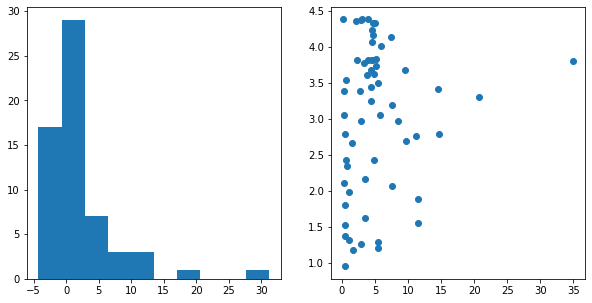

In [205]:
# Plots for: Distribution of Error in prediction and Scatter plot for y_test vs Prediction
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.hist(y_test-y_pred_svr)
plt.subplot(1,2,2)
plt.scatter(y_test,y_pred_svr)

plt.show()

#### Linear Regression

In [206]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
y_pred_lr = lr_model.predict(X_test)


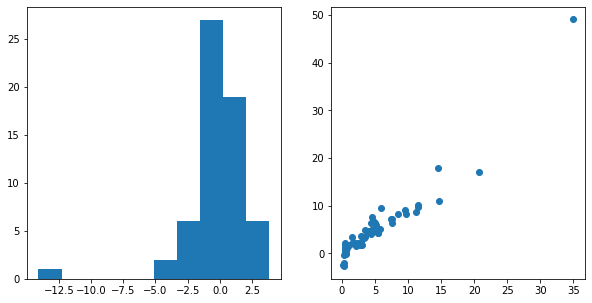

In [207]:
# Plots for: Distribution of Error in prediction and Scatter plot for y_test vs Prediction
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.hist(y_test-y_pred_lr)
plt.subplot(1,2,2)
plt.scatter(y_test,y_pred_lr)

plt.show()

In [208]:
# Checking the mse and r2_score
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_lr)
# Print mse results
print("Mean Squared Error is: ",mse)
# Printing R-square for Training data
print("R2 on Training Data is: ",r2_score(y_train,lr_model.predict(X_train)))

# Printing R-square for Test data
print("R2 on Test Data is: ",r2_score(y_test,lr_model.predict(X_test)))


Mean Squared Error is:  5.471727589387837
R2 on Training Data is:  0.8835326358259441
R2 on Test Data is:  0.8230819900971287


#### Exporting the model

In [210]:
import pickle
file = open('rf_model.pkl','wb')
pickle.dump(rf_random,file)
file2 = open('svr_model.pkl','wb')
pickle.dump(svr_model,file2)
file3 = open('lr_model.pkl','wb')
pickle.dump(lr_model,file3)